In [1]:
import matplotlib.pyplot as mp
import read_dao
import sys
import coordinates
import numpy as np
from matplotlib.ticker import ScalarFormatter
from astropy.wcs import WCS
import optical
import glob
from astropy.io import fits
import re
%matplotlib inline 

In [2]:
target = 'NGC7078'
folder = '/Users/jrneeley/CRRP/'+target+'/'
channel = 'I1'
optical_folder = '/Users/jrneeley/CRRP/OpticalCatalogs/'

In [3]:
img_list = glob.glob(folder+'mosaics/'+channel+'*dn.fits')
img = fits.open(img_list[0])
hdr = img[0].header
ra = hdr['CRVAL1']
dec = hdr['CRVAL2']

phot_list = re.sub('.fits', '.als', img_list[0])
dtype1 = np.dtype([('x', float), ('y', float)])
data = np.loadtxt(phot_list, dtype=dtype1, skiprows=3, usecols=(1,2))
xmin = np.min(data['x'])
xmax = np.max(data['x'])
ymin = np.min(data['y'])
ymax = np.max(data['y'])

w = WCS(img_list[0])
ra1, dec1 = w.wcs_pix2world(xmin, ymin, 0)
ra2, dec2 = w.wcs_pix2world(xmin, ymax, 0)
ra3, dec3 = w.wcs_pix2world(xmax, ymax, 0)
ra4, dec4 = w.wcs_pix2world(xmax, ymin, 0)

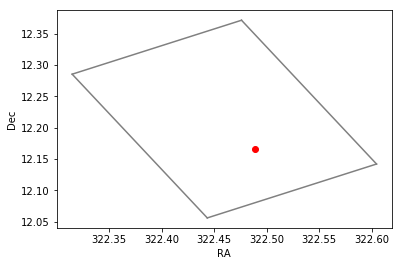

In [4]:
# Plot AOR footprint
mp.plot(ra, dec, 'ro')
mp.plot([ra1, ra2], [dec1, dec2], '-', color='0.5')
mp.plot([ra2, ra3], [dec2, dec3], '-', color='0.5')
mp.plot([ra3, ra4], [dec3, dec4], '-', color='0.5')
mp.plot([ra4, ra1], [dec4, dec1], '-', color='0.5')
mp.xlabel('RA')
mp.ylabel('Dec')

x_formatter = ScalarFormatter(useOffset=False)
mp.gca().xaxis.set_major_formatter(x_formatter)
mp.show()


Reading optical catalog for NGC7078...
Finished reading optical catalog.


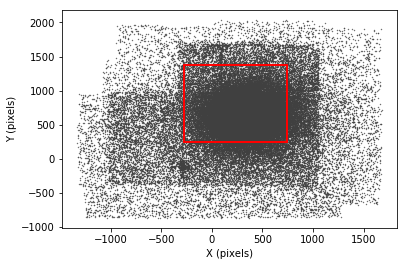

In [6]:
ids, xcat, ycat, ra, dec = optical.read_optical_fnl(optical_folder, target)

dtype1 = np.dtype([('xmin', float), ('xmax', float), ('ymin', float), ('ymax', float)])
cuts = np.loadtxt(folder+channel+'-mosaic-catalog-cuts.txt', dtype=dtype1, usecols=(1,2,3,4))

mp.plot(xcat, ycat, '.', color='0.25', markersize=0.75)
mp.plot([cuts['xmin'], cuts['xmax']], [cuts['ymin'], cuts['ymin']],
    'r-', linewidth=2)
mp.plot([cuts['xmin'], cuts['xmax']], [cuts['ymax'], cuts['ymax']],
    'r-', linewidth=2)
mp.plot([cuts['xmin'], cuts['xmin']], [cuts['ymin'], cuts['ymax']],
    'r-', linewidth=2)
mp.plot([cuts['xmax'], cuts['xmax']], [cuts['ymin'], cuts['ymax']],
    'r-', linewidth=2)
mp.xlabel('X (pixels)')
mp.ylabel('Y (pixels)')
mp.show()

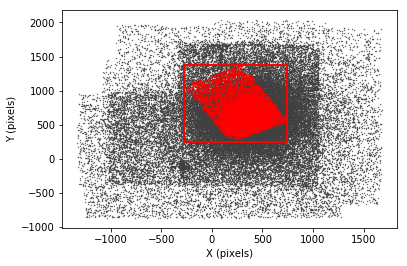

In [7]:
mp.plot(xcat, ycat, '.', color='0.25', markersize=0.75)
mp.plot([cuts['xmin'], cuts['xmax']], [cuts['ymin'], cuts['ymin']],
    'r-', linewidth=2)
mp.plot([cuts['xmin'], cuts['xmax']], [cuts['ymax'], cuts['ymax']],
    'r-', linewidth=2)
mp.plot([cuts['xmin'], cuts['xmin']], [cuts['ymin'], cuts['ymax']],
    'r-', linewidth=2)
mp.plot([cuts['xmax'], cuts['xmax']], [cuts['ymin'], cuts['ymax']],
    'r-', linewidth=2)
mp.xlabel('X (pixels)')
mp.ylabel('Y (pixels)')
mp.savefig('mosaic-boundaries-map.eps', format='eps')

# Add on transformed catalogs

IRids, IRx, IRy, IRmag, IRerr = read_dao.read_mag(folder+channel+'_mosaic.mag')
files, x_off, y_off, transform, dof = read_dao.read_mch(folder+'op-'+channel+'-mosaic.mch')
x = float(x_off[1])+float(transform[1][0])*IRx+float(transform[1][1])*IRy
y = float(y_off[1])+float(transform[1][2])*IRx+float(transform[1][3])*IRy
mp.plot(x, y, 'r.', markersize=1.8 )
mp.show()